In [65]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import pandas as pd
import multiprocessing
from joblib import Parallel, delayed
num_cores = multiprocessing.cpu_count()
if num_cores == 32:
    num_cores = 24  # lsst-dev - don't use all the cores, man.
elif num_cores == 8:
    num_cores = 3
elif num_cores == 4:
    num_cores = 2
print num_cores

import seaborn as sns
print sns.__version__
sns.set(style="whitegrid", palette="pastel", color_codes=True)

class sizeme():
    """ Class to change html fontsize of object's representation"""
    def __init__(self, ob, size=50, height=120):
        self.ob = ob
        self.size = size
        self.height = height
    def _repr_html_(self):
        repl_tuple = (self.size, self.height, self.ob._repr_html_())
        return u'<span style="font-size:{0}%; line-height:{1}%">{2}</span>'.format(*repl_tuple)

pd.options.display.max_columns = 9999
pd.set_option('display.width', 9999)

import warnings
warnings.filterwarnings('ignore')

import diffimTests as dit

3
0.7.0


In [2]:
# Set up console so we can reattach via terminal ipython later. See:
# https://stackoverflow.com/questions/19479645/using-ipython-console-along-side-ipython-notebook

%qtconsole

# Then do `ipython console --existing` in a terminal to connect and have access to same data!
# But note, do not do CTRL-D in that terminal or it will kill the kernel!

Note `avoidBorder=False` is slow, because stars near the border need to be rendered with care. But, `avoidBorder=True` messes up A&L, so we'll stick with `avoidBorder=False`.

{'ZOGY': {'FP': 6, 'FN': 34, 'TP': 16}, 'ALstack': {'FP': 3, 'FN': 39, 'TP': 11}, 'SZOGY': {'FP': 5, 'FN': 34, 'TP': 16}, 'ALstack_decorr': {'FP': 5, 'FN': 37, 'TP': 13}}
3.08842849731 22.2074163008 	303.088428497 22.2074163008
3.30215835571 20.7582674528 	303.302158356 20.7582674528


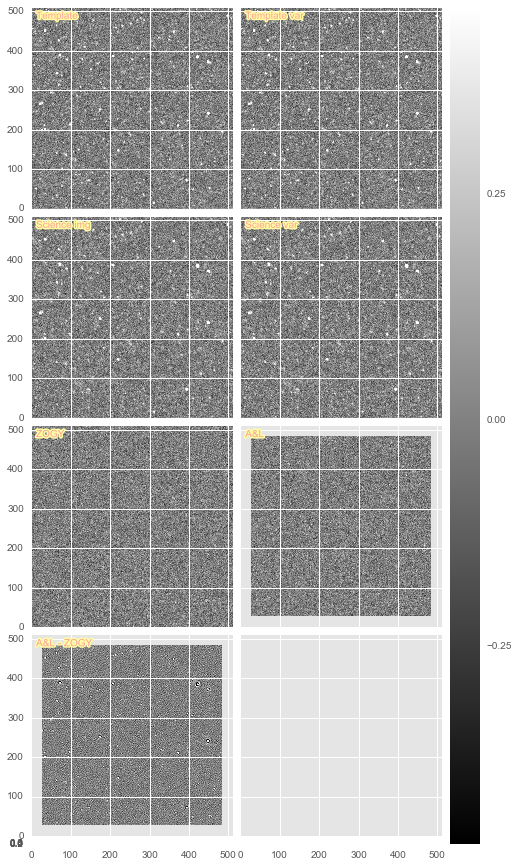

In [36]:
reload(dit);
testObj = dit.DiffimTest()
res = testObj.runTest()
print res
print np.mean(testObj.im1.im), np.std(testObj.im1.im), '\t', np.mean(testObj.im1.var), np.std(testObj.im1.var)
print np.mean(testObj.im2.im), np.std(testObj.im2.im), '\t', np.mean(testObj.im2.var), np.std(testObj.im2.var)
fig = plt.figure(1, (15, 15))
testObj.doPlot(nrows_ncols=(5, 2))

## Test out new options.

First, `templateNoNoise`.

{'ZOGY': {'FP': 3, 'FN': 22, 'TP': 28}, 'ALstack': {'FP': 4, 'FN': 25, 'TP': 25}, 'SZOGY': {'FP': 7, 'FN': 25, 'TP': 25}, 'ALstack_decorr': {'FP': 3, 'FN': 31, 'TP': 19}}
3.14415679036 13.8121811232 	3.14415679036 13.8121811232
3.29524612427 20.7526759833 	303.295246124 20.7526759833


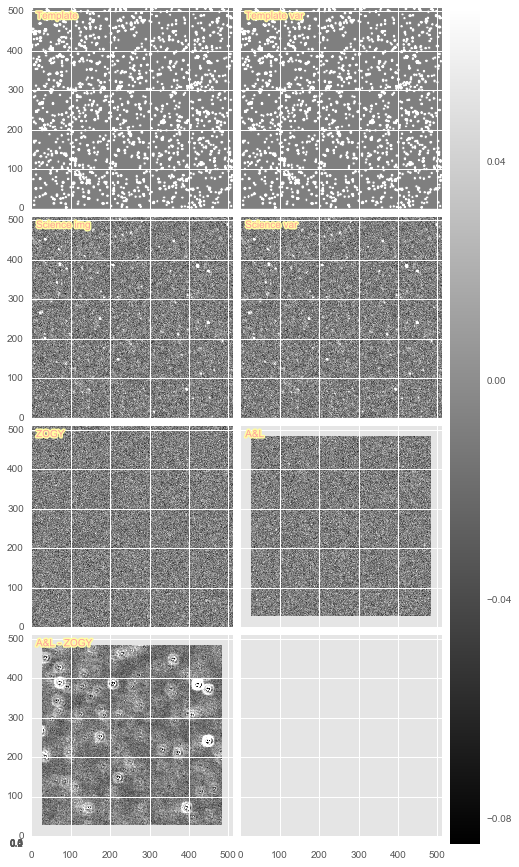

In [37]:
reload(dit);
testObj = dit.DiffimTest(templateNoNoise=True)
res = testObj.runTest()
print res
print np.mean(testObj.im1.im), np.std(testObj.im1.im), '\t', np.mean(testObj.im1.var), np.std(testObj.im1.var)
print np.mean(testObj.im2.im), np.std(testObj.im2.im), '\t', np.mean(testObj.im2.var), np.std(testObj.im2.var)
fig = plt.figure(1, (15, 15))
testObj.doPlot(nrows_ncols=(5, 2))

Next, `skyLimited`.

{'ZOGY': {'FP': 6, 'FN': 34, 'TP': 16}, 'ALstack': {'FP': 2, 'FN': 39, 'TP': 11}, 'SZOGY': {'FP': 5, 'FN': 32, 'TP': 18}, 'ALstack_decorr': {'FP': 4, 'FN': 37, 'TP': 13}}
3.08842849731 22.2074163008 	299.945205688 17.3113591266
3.30215835571 20.7582674528 	300.014736176 17.3490974031


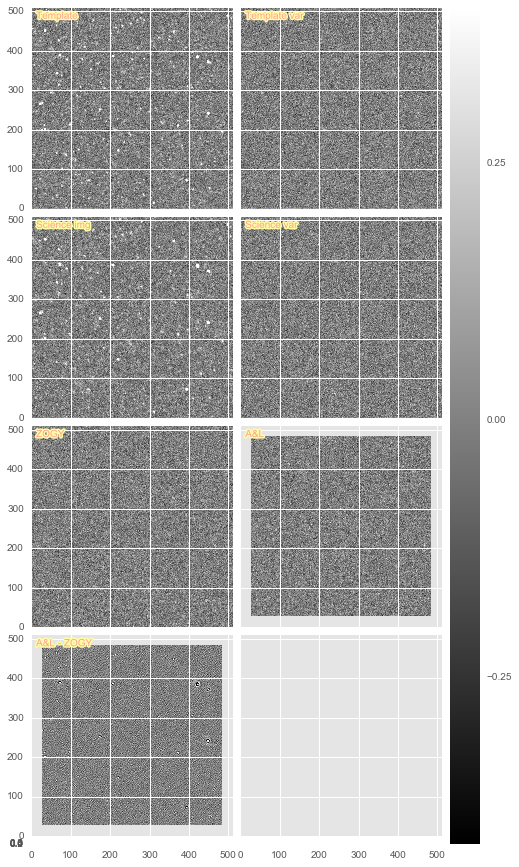

In [38]:
reload(dit);
testObj = dit.DiffimTest(skyLimited=True)
res = testObj.runTest()
print res
print np.mean(testObj.im1.im), np.std(testObj.im1.im), '\t', np.mean(testObj.im1.var), np.std(testObj.im1.var)
print np.mean(testObj.im2.im), np.std(testObj.im2.im), '\t', np.mean(testObj.im2.var), np.std(testObj.im2.var)
fig = plt.figure(1, (15, 15))
testObj.doPlot(nrows_ncols=(5, 2))

Try both...

{'ZOGY': {'FP': 2, 'FN': 22, 'TP': 28}, 'ALstack': {'FP': 3, 'FN': 24, 'TP': 26}, 'SZOGY': {'FP': 6, 'FN': 22, 'TP': 28}, 'ALstack_decorr': {'FP': 2, 'FN': 25, 'TP': 25}}
3.14415679036 13.8121811232 	0.0 0.0
3.29524612427 20.7526759833 	300.014736176 17.3490974031


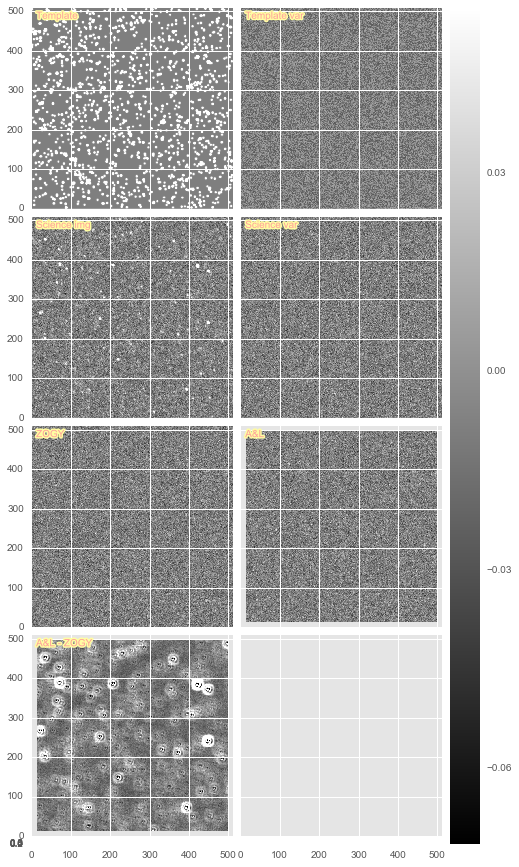

In [39]:
reload(dit);
testObj = dit.DiffimTest(templateNoNoise=True, skyLimited=True)
res = testObj.runTest()
print res
print np.mean(testObj.im1.im), np.std(testObj.im1.im), '\t', np.mean(testObj.im1.var), np.std(testObj.im1.var)
print np.mean(testObj.im2.im), np.std(testObj.im2.im), '\t', np.mean(testObj.im2.var), np.std(testObj.im2.var)
testObj.im1.var += np.random.uniform(size=testObj.im1.var.shape)  # need to make it so we can plot it.
fig = plt.figure(1, (15, 15))
testObj.doPlot(nrows_ncols=(5, 2))

In [92]:
methods = ['ALstack', 'ZOGY', 'SZOGY', 'ALstack_decorr']

def plotResults(tr, doRates=False, title='', asHist=False, doPrint=True):
    FN = pd.DataFrame({key: np.array([t[key]['FN'] for t in tr]) for key in methods})
    FP = pd.DataFrame({key: np.array([t[key]['FP'] for t in tr]) for key in methods})
    TP = pd.DataFrame({key: np.array([t[key]['TP'] for t in tr]) for key in methods})
    title_suffix = 's'
    if doRates:
        FN /= (FN + TP)
        FP /= (FN + TP)
        TP /= (FN + TP)
        title_suffix = ' rate'
    if doPrint:
        print 'FN:', '\n', FN.mean()
        print 'FP:', '\n', FP.mean()
        print 'TP:', '\n', TP.mean()

    matplotlib.rcParams['figure.figsize'] = (18.0, 6.0)
    fig, axes = plt.subplots(nrows=1, ncols=2)

    if not asHist:
        sns.violinplot(data=TP, cut=True, linewidth=0.3, bw=0.25, ax=axes[0])
        sns.swarmplot(data=TP, color='black', ax=axes[0])
        sns.boxplot(data=TP, saturation=0.5, ax=axes[0])
        plt.setp(axes[0], alpha=0.3)
        axes[0].set_ylabel('True positive' + title_suffix)
        axes[0].set_title(title)
        sns.violinplot(data=FP, cut=True, linewidth=0.3, bw=0.5, ax=axes[1])
        sns.swarmplot(data=FP, color='black', ax=axes[1])
        sns.boxplot(data=FP, saturation=0.5, ax=axes[1])
        plt.setp(axes[1], alpha=0.3)
        axes[1].set_ylabel('False positive' + title_suffix)
        axes[1].set_title(title)
    else:
        for t in TP:
            sns.distplot(TP[t], label=t, norm_hist=False, ax=axes[0])
        axes[0].set_xlabel('True positive' + title_suffix)
        axes[0].set_title(title)
        legend = axes[0].legend(loc='upper left', shadow=True)
        for t in FP:
            sns.distplot(FP[t], label=t, norm_hist=False, ax=axes[1])
        axes[1].set_xlabel('False positive' + title_suffix)
        axes[1].set_title(title)
        legend = axes[1].legend(loc='upper left', shadow=True)

In [ ]:
def runTest(flux, seed=66, n_varSources=50):
    testObj = dit.DiffimTest(varFlux2=np.repeat(flux, n_varSources), seed=seed,
                            templateNoNoise=True, skyLimited=True)
    det = testObj.runTest()
    det['flux'] = flux
    return det

inputs = [(f, seed) for f in [750.] for seed in np.arange(66, 166, 1)]
print len(inputs)
testResults1 = Parallel(n_jobs=num_cores, verbose=2)(delayed(runTest)(i[0], i[1]) for i in inputs)

In [ ]:
import cPickle, gzip
cPickle.dump((testResults1), gzip.GzipFile("30. 1. results.p.gz", "wb"))

FN: 
ALstack           27.20
ALstack_decorr    24.54
SZOGY             21.93
ZOGY              19.70
dtype: float64
FP: 
ALstack           3.79
ALstack_decorr    4.66
SZOGY             8.17
ZOGY              5.33
dtype: float64
TP: 
ALstack           22.78
ALstack_decorr    25.44
SZOGY             28.05
ZOGY              30.27
dtype: float64


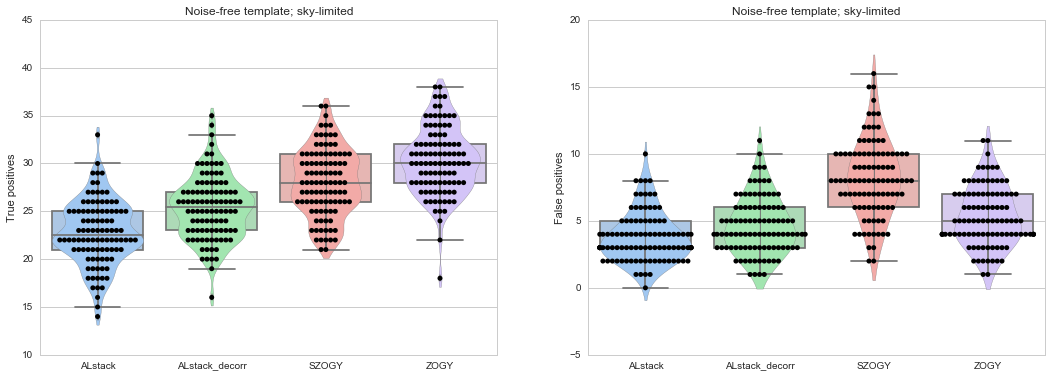

In [93]:
#import cPickle, gzip
#testResults1 = cPickle.load(gzip.GzipFile("30. 1. results.p.gz", "rb"))
plotResults(testResults1, title='Noise-free template; sky-limited')

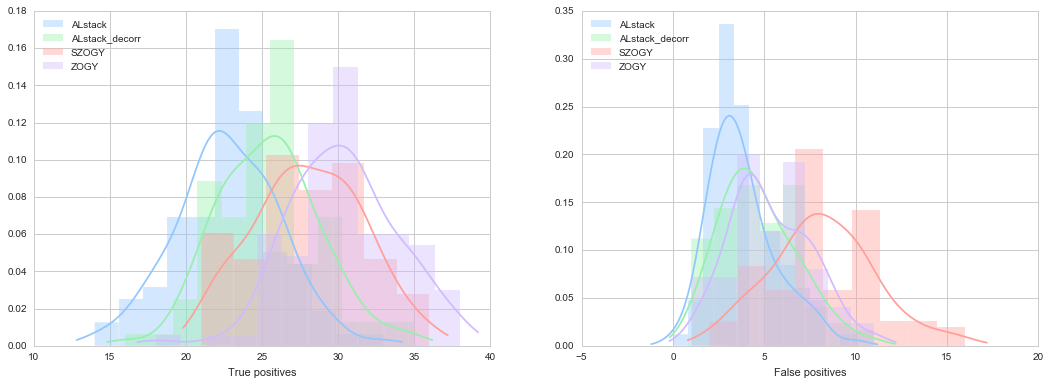

In [94]:
plotResults(testResults1, asHist=True, doPrint=False)

In [ ]:
def runTest2(flux, seed=66, n_varSources=50):
    testObj = dit.DiffimTest(varFlux2=np.repeat(flux, n_varSources), seed=seed,
                            templateNoNoise=True, skyLimited=False)
    det = testObj.runTest()
    det['flux'] = flux
    return det

testResults2 = Parallel(n_jobs=num_cores, verbose=2)(delayed(runTest2)(i[0], i[1]) for i in inputs)
cPickle.dump((testResults1, testResults2), gzip.GzipFile("30. 1. results.p.gz", "wb"))

FN: 
ALstack           27.11
ALstack_decorr    27.43
SZOGY             23.33
ZOGY              19.69
dtype: float64
FP: 
ALstack           3.69
ALstack_decorr    4.13
SZOGY             8.25
ZOGY              5.32
dtype: float64
TP: 
ALstack           22.87
ALstack_decorr    22.56
SZOGY             26.65
ZOGY              30.28
dtype: float64


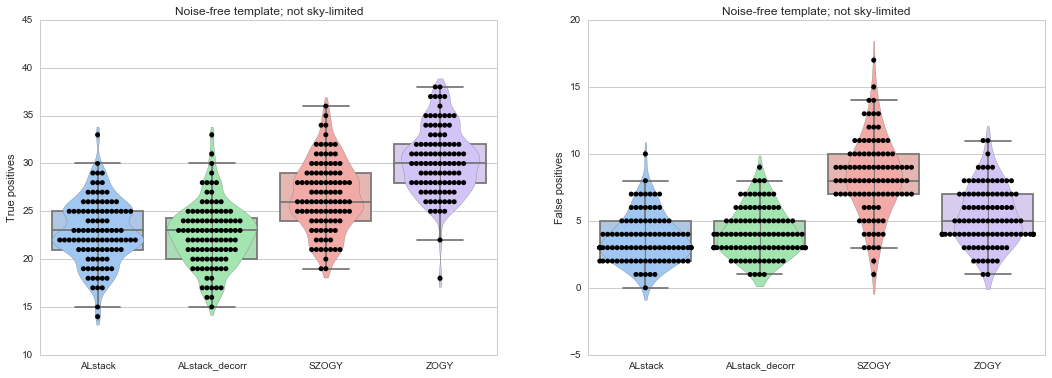

In [74]:
plotResults(testResults2, title='Noise-free template; not sky-limited')

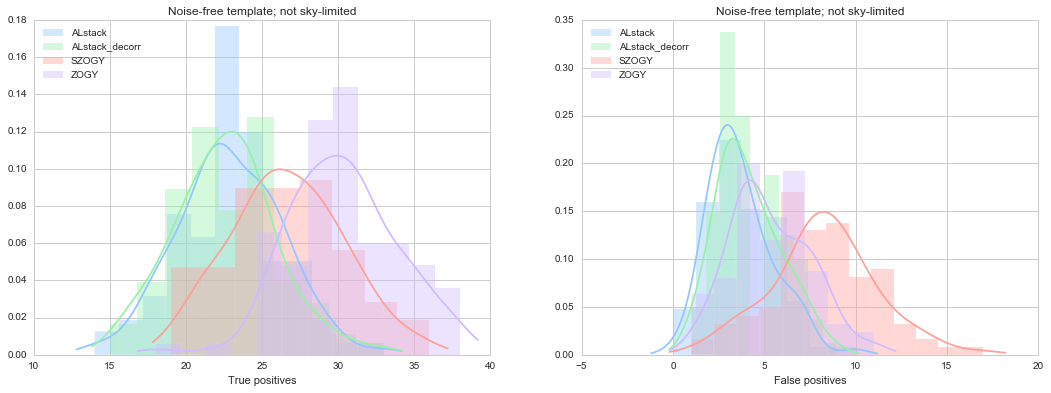

In [75]:
plotResults(testResults2, title='Noise-free template; not sky-limited', asHist=True, doPrint=False)

In [ ]:
def runTest3(flux, seed=66, n_varSources=50):
    testObj = dit.DiffimTest(varFlux2=np.repeat(flux, n_varSources), seed=seed,
                            templateNoNoise=False, skyLimited=False)
    det = testObj.runTest()
    det['flux'] = flux
    return det

testResults3 = Parallel(n_jobs=num_cores, verbose=2)(delayed(runTest3)(i[0], i[1]) for i in inputs)
cPickle.dump((testResults1, testResults2, testResults3), gzip.GzipFile("30. 1. results.p.gz", "wb"))

FN: 
ALstack           41.97
ALstack_decorr    38.79
SZOGY             37.57
ZOGY              35.66
dtype: float64
FP: 
ALstack           3.00
ALstack_decorr    4.14
SZOGY             4.95
ZOGY              3.51
dtype: float64
TP: 
ALstack            8.01
ALstack_decorr    11.20
SZOGY             12.40
ZOGY              14.31
dtype: float64


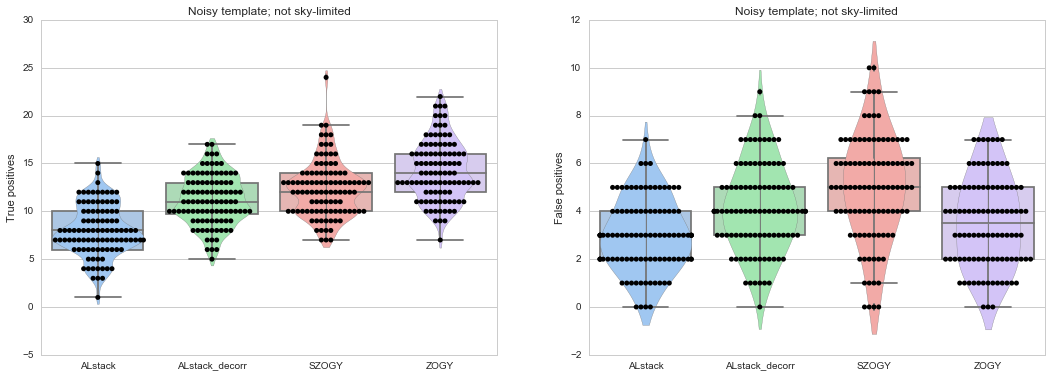

In [76]:
plotResults(testResults3, title='Noisy template; not sky-limited')

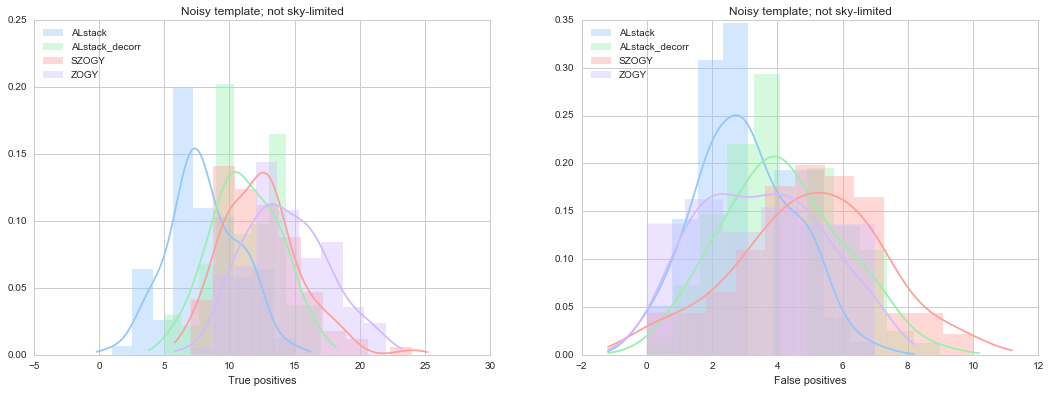

In [77]:
plotResults(testResults3, title='Noisy template; not sky-limited', asHist=True, doPrint=False)

In [95]:
def runTest4(flux, seed=66, n_varSources=50):
    testObj = dit.DiffimTest(varFlux2=np.repeat(flux, n_varSources), seed=seed,
                            templateNoNoise=False, skyLimited=True)
    det = testObj.runTest()
    det['flux'] = flux
    return det

testResults4 = Parallel(n_jobs=num_cores, verbose=2)(delayed(runTest3)(i[0], i[1]) for i in inputs)
cPickle.dump((testResults1, testResults2, testResults3, testResults4), gzip.GzipFile("30. 1. results.p.gz", "wb"))

[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:  6.2min
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed: 17.4min finished


FN: 
ALstack           41.97
ALstack_decorr    38.79
SZOGY             37.57
ZOGY              35.66
dtype: float64
FP: 
ALstack           3.00
ALstack_decorr    4.14
SZOGY             4.95
ZOGY              3.51
dtype: float64
TP: 
ALstack            8.01
ALstack_decorr    11.20
SZOGY             12.40
ZOGY              14.31
dtype: float64


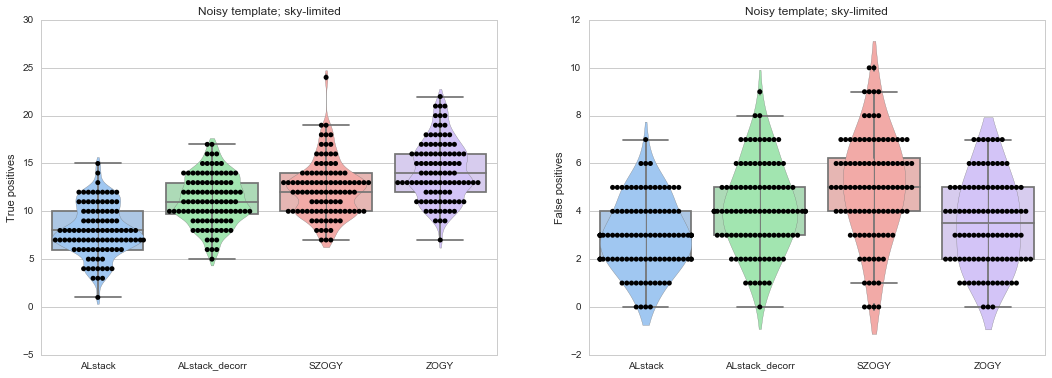

In [96]:
plotResults(testResults4, title='Noisy template; sky-limited')

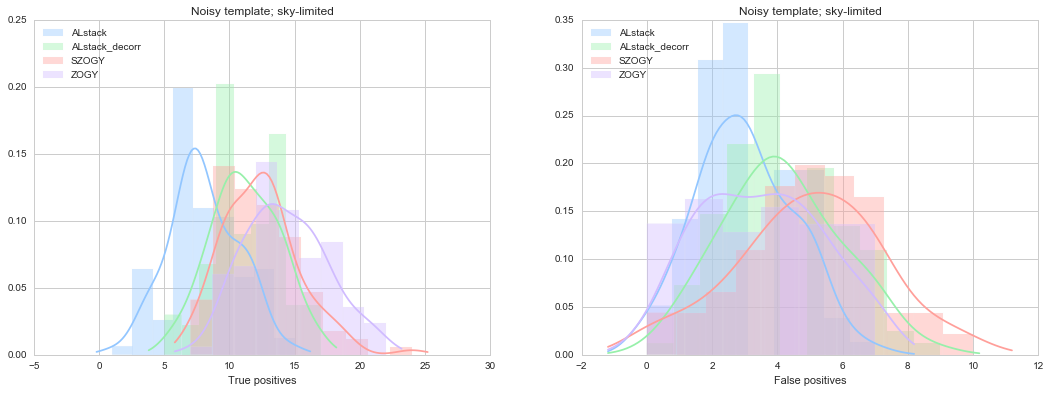

In [97]:
plotResults(testResults4, title='Noisy template; sky-limited', asHist=True, doPrint=False)